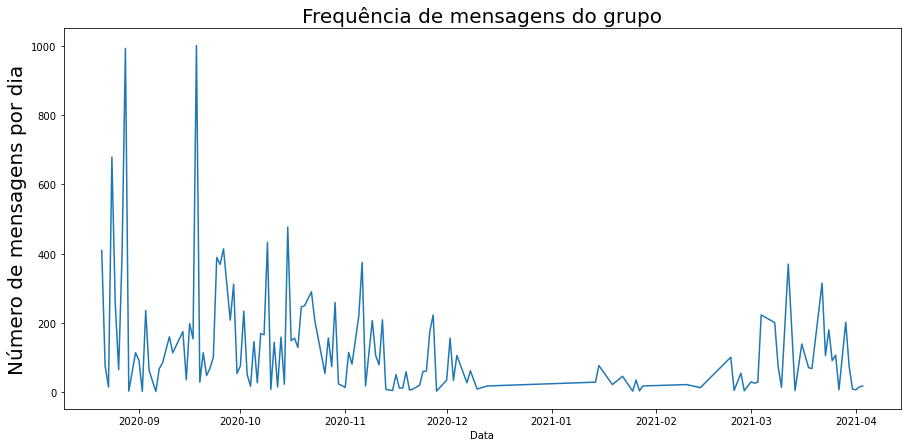

In [6]:
import re
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

filename = "./Conversa do WhatsApp com Trabalhos 📚.txt" # Alterar para o nome do arquivo 
pattern = r"\[?(\d{2})\/(\d{2})\/(\d{4}) .*\]?.*"
 
comments_day = {}
 
with open(filename, "r", encoding="utf-8") as f:
    for line in f:
        match = re.match(pattern, line)
        if match:
            day, month, year = match.group(1), match.group(2), match.group(3)
            date = datetime.strptime(f"{day} {month} {year}", "%d %m %Y")
            if date not in comments_day.keys():
                comments_day[date] = 1
            else:
                comments_day[date] += 1
 
lists = sorted(comments_day.items())
x, y = zip(*lists)
plt.style.use("fast")
fig,ax = plt.subplots(figsize=(15,7))
ax.plot(x,y)
plt.ylabel("Número de mensagens por dia", fontsize=20)
plt.xlabel("Data")
plt.title("Frequência de mensagens do grupo", fontsize=20)
plt.show()

In [7]:
#contando mensagens
file = open(filename,mode='r',encoding="utf8")
data = file.read()
file.close()
pattern2 = re.compile('\d+:\d+\s+-\s+([a-zA-Z0-9]+\s?[a-zA-Z0-9]+\s?[a-zA-Z0-9]+\s?):\s+')
messengers = re.findall(pattern2,data)
count_messages={}
for each in messengers:
    if each in count_messages.keys():
        count_messages[each]+=1
    else:
        count_messages[each]=1
count_messages

{'Mestre Dos Magos': 6622, 'Chico': 3242, 'Evelyn': 1615, 'Mariana': 246}

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

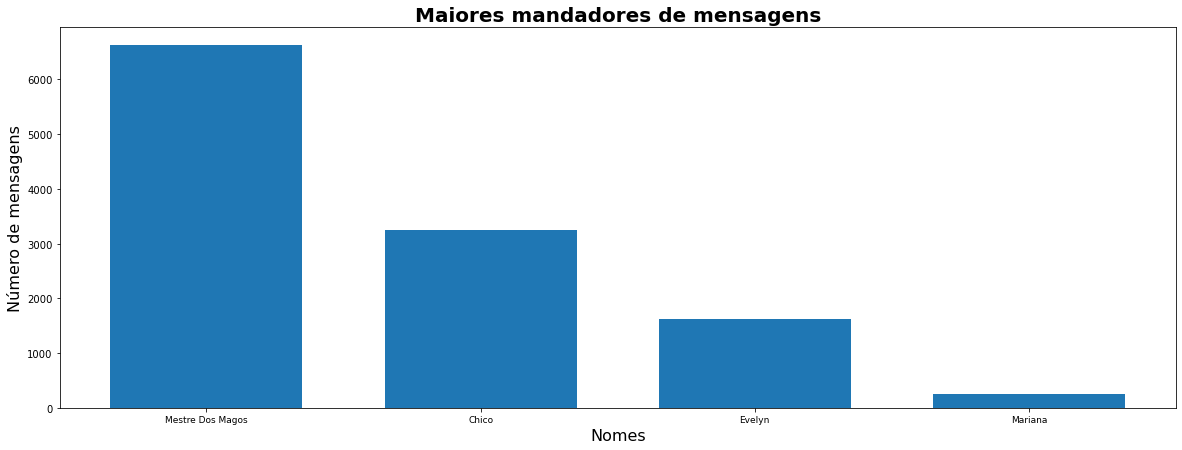

In [8]:
df = pd.DataFrame(pd.Series(count_messages))
df.reset_index(level=0,inplace=True) #tirando o index
df = df.rename(columns={"index":"Nome", 0: "Mensagens"})
df.sort_values('Mensagens',inplace=True, ascending = False)
#Setup gráfico
figx,ax = plt.subplots(figsize=(20,7))
ax.bar(df.Nome, df.Mensagens, align="center",width=0.7)
plt.title("Maiores mandadores de mensagens", fontsize=20,fontweight='bold')
plt.xlabel("Nomes", fontsize=16)
plt.ylabel("Número de mensagens", fontsize=16)
plt.xticks(fontsize=9)